In [2]:
import pandas as pd
import yfinance as yf
import datetime
import openpyxl
from datetime import datetime

c:\Users\alice\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
tickers_GALP_EDP = ['GALP.LS', 'EDP.LS']
DATA_GALP_EDP = yf.download(tickers_GALP_EDP, period= '1y', interval= '1h')['Close']
DATA_GALP_EDP = DATA_GALP_EDP.reset_index()
DATA_GALP_EDP

[*********************100%%**********************]  2 of 2 completed


Ticker,Datetime,EDP.LS,GALP.LS
0,2023-03-15 09:00:00+00:00,4.828,10.190
1,2023-03-15 10:00:00+00:00,4.814,10.050
2,2023-03-15 11:00:00+00:00,4.865,10.040
3,2023-03-15 12:00:00+00:00,4.810,9.960
4,2023-03-15 13:00:00+00:00,4.818,9.850
...,...,...,...
2043,2024-03-14 12:00:00+00:00,3.672,14.680
2044,2024-03-14 13:00:00+00:00,3.647,14.595
2045,2024-03-14 14:00:00+00:00,3.629,14.625
2046,2024-03-14 15:00:00+00:00,3.630,14.650


In [6]:
corr_matrix =DATA_GALP_EDP.corr()['GALP.LS']
corr_matrix

Ticker
Datetime    0.916047
EDP.LS     -0.761012
GALP.LS     1.000000
Name: GALP.LS, dtype: float64

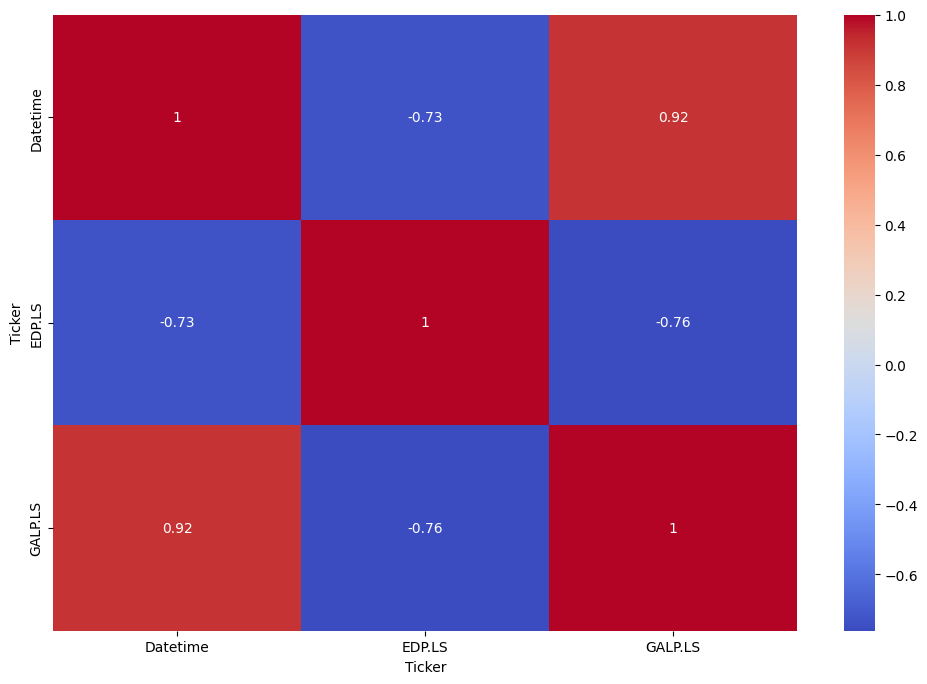

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(DATA_GALP_EDP.corr(), annot=True, cmap='coolwarm')
plt.show()

In [9]:
DATA_GALP_EDP['GALP_NORM'] = DATA_GALP_EDP['GALP.LS'].multiply(0.47379784).round(4)
DATA_GALP_EDP.head()

Ticker,Datetime,EDP.LS,GALP.LS,GALP_NORM
0,2023-03-15 09:00:00+00:00,4.828,10.19,4.8280
1,2023-03-15 10:00:00+00:00,4.814,10.05,4.7617
2,2023-03-15 11:00:00+00:00,4.865,10.04,4.7569
3,2023-03-15 12:00:00+00:00,4.810,9.96,4.7190
4,2023-03-15 13:00:00+00:00,4.818,9.85,4.6669


In [10]:
DATA_GALP_EDP['RACIO'] = ((DATA_GALP_EDP['GALP_NORM'] - DATA_GALP_EDP['GALP.LS']) / (DATA_GALP_EDP['GALP_NORM'] + DATA_GALP_EDP['EDP.LS'])).multiply(100).round(3)
DATA_GALP_EDP.head()

Ticker,Datetime,EDP.LS,GALP.LS,GALP_NORM,RACIO
0,2023-03-15 09:00:00+00:00,4.828,10.19,4.8280,-55.530
1,2023-03-15 10:00:00+00:00,4.814,10.05,4.7617,-55.226
2,2023-03-15 11:00:00+00:00,4.865,10.04,4.7569,-54.907
3,2023-03-15 12:00:00+00:00,4.810,9.96,4.7190,-55.001
4,2023-03-15 13:00:00+00:00,4.818,9.85,4.6669,-54.646


In [11]:
DATA_GALP_EDP['Date_time'] = DATA_GALP_EDP['Datetime'] + pd.Timedelta(hours=5)
DATA_GALP_EDP=DATA_GALP_EDP.drop(['Datetime'], axis=1)
DATA_GALP_EDP['Date_time'] = DATA_GALP_EDP['Date_time'].dt.tz_localize(None)
DATA_GALP_EDP=DATA_GALP_EDP[['Date_time', 'GALP.LS', 'EDP.LS', 'GALP_NORM', 'RACIO']]

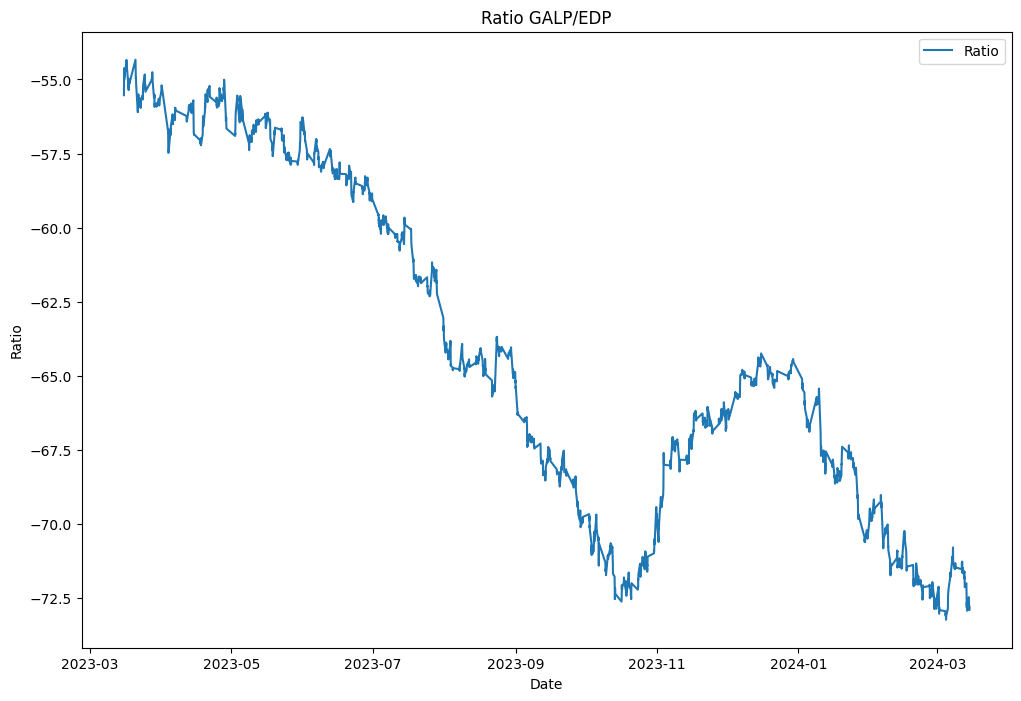

In [14]:
# Plotting the Ratio
plt.figure(figsize=(12, 8))
plt.plot(DATA_GALP_EDP['Date_time'], DATA_GALP_EDP['RACIO'], label='Ratio')
plt.title('Ratio GALP/EDP')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.legend()
plt.show()



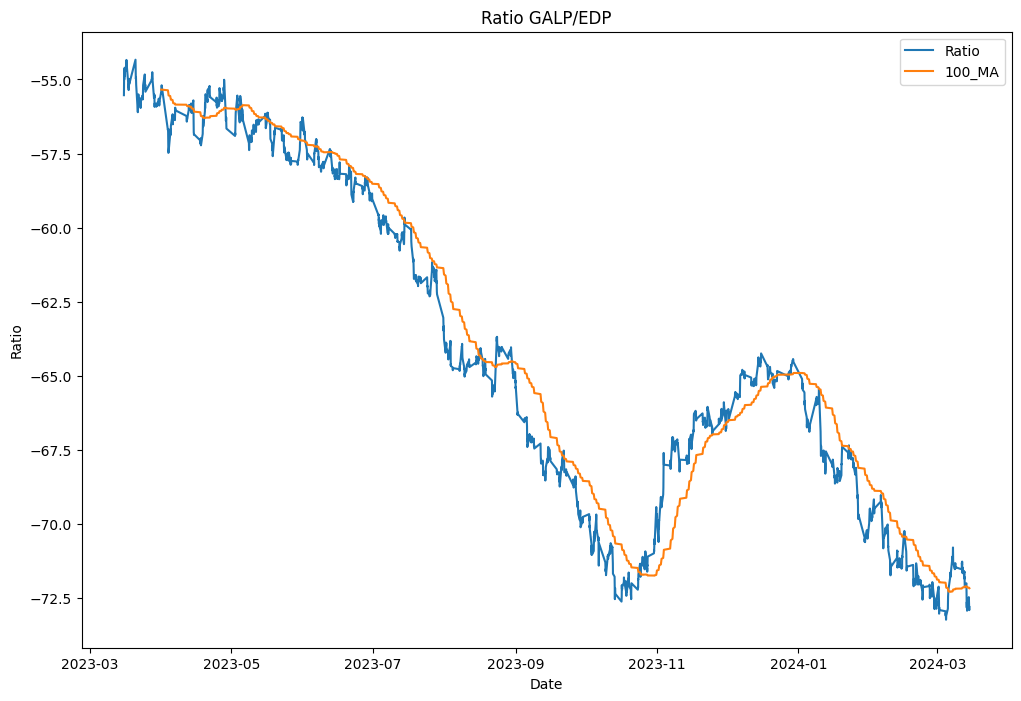

In [15]:
# calculation and plotting moving average of 100 positions 
DATA_GALP_EDP['100_MA'] = DATA_GALP_EDP['RACIO'].rolling(window=100).mean()
plt.figure(figsize=(12, 8))
plt.plot(DATA_GALP_EDP['Date_time'], DATA_GALP_EDP['RACIO'], label='Ratio')
plt.plot(DATA_GALP_EDP['Date_time'], DATA_GALP_EDP['100_MA'], label='100_MA')
plt.title('Ratio GALP/EDP')
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.legend()
plt.show()
